In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [164]:
tmp1 = pd.read_csv("dataset/data0910.csv")
tmp2 = pd.read_csv("dataset/data1011.csv")

In [165]:
data = pd.concat([tmp1, tmp2], axis=0)

In [166]:
data = data.drop_duplicates()

In [167]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1033036 non-null  object 
 1   StockCode    1033036 non-null  object 
 2   Description  1028761 non-null  object 
 3   Quantity     1033036 non-null  int64  
 4   InvoiceDate  1033036 non-null  object 
 5   Price        1033036 non-null  float64
 6   Customer ID  797885 non-null   float64
 7   Country      1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [169]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [170]:
data = data.dropna()

In [171]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

In [172]:
data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

In [173]:
data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

In [174]:
data['total_price'] = data['Quantity'] * data['Price']

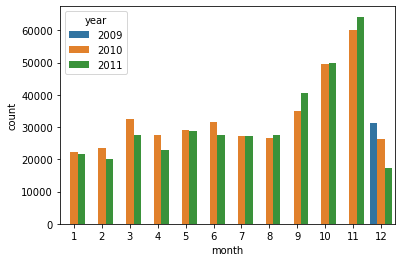

In [175]:
sns.countplot(x=data['month'], hue=data['year'])
plt.show();

<AxesSubplot:xlabel='day', ylabel='count'>

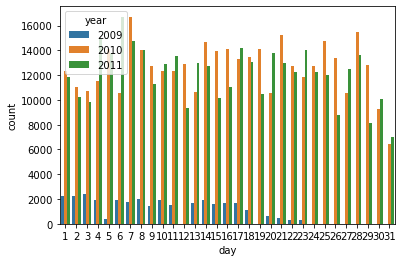

In [176]:
sns.countplot(x=data['day'], hue=data['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

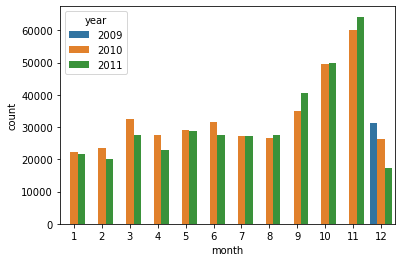

In [177]:
sns.countplot(x=data['month'], hue=data['year'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

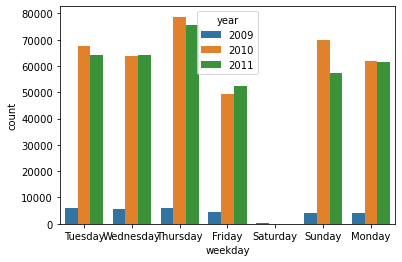

In [178]:
sns.countplot(x=data['weekday'], hue=data['year'])

<AxesSubplot:xlabel='hour', ylabel='count'>

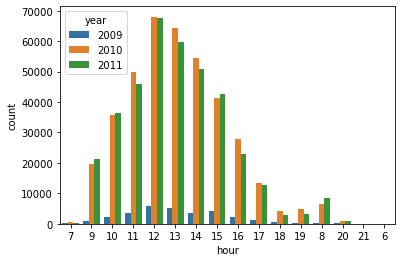

In [179]:
sns.countplot(x=data['hour'], hue=data['year'])

In [180]:
data[data['year'] == 2009]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45219,493407,21993,FLORAL FOLK STATIONERY SET,1,12/23/2009 16:04,2.95,17867.0,United Kingdom,2009-12-23,16:04,16,2009,12,23,4,Wednesday,2.95
45220,493407,21992,VINTAGE PAISLEY STATIONERY SET,1,12/23/2009 16:04,2.95,17867.0,United Kingdom,2009-12-23,16:04,16,2009,12,23,4,Wednesday,2.95
45221,493407,21991,BOHEMIAN COLLAGE STATIONERY SET,1,12/23/2009 16:04,2.95,17867.0,United Kingdom,2009-12-23,16:04,16,2009,12,23,4,Wednesday,2.95
45222,493407,21034,REX CASH+CARRY JUMBO SHOPPER,10,12/23/2009 16:04,0.95,17867.0,United Kingdom,2009-12-23,16:04,16,2009,12,23,4,Wednesday,9.50


In [181]:
data.describe()

,Quantity,Price,Customer ID,year,month,day,quarter,total_price
count,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,2010.431108,7.411434,15.387388,2.795019,20.416465
std,191.670371,71.392549,1696.466663,0.568904,3.424495,8.658264,1.132430,313.518824
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13964.000000,2010.000000,5.000000,8.000000,2.000000,4.350000
50%,5.000000,1.950000,15228.000000,2010.000000,8.000000,15.000000,3.000000,11.700000
75%,12.000000,3.750000,16788.000000,2011.000000,10.000000,23.000000,4.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,4.000000,168469.600000


### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [182]:
tmp = data[data['Quantity'] < 0]

In [183]:
tmp[tmp['Invoice'].str.find("C") == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011-12-09,9:57,9,2011,12,9,4,Friday,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011-12-09,10:28,10,2011,12,9,4,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011-12-09,11:57,11,2011,12,9,4,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011-12-09,11:58,11,2011,12,9,4,Friday,-1.25


In [184]:
tmp[tmp['Invoice'].str.find("C") != 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price


In [185]:
data[(data['Invoice'].str.find("C") == 0) & (data['Quantity'] > 0 )]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price


In [186]:
data[data['Customer ID'] == 12346.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
27994,491725,TEST001,This is a test product.,10,12/14/2009 8:34,4.50,12346.0,United Kingdom,2009-12-14,8:34,8,2009,12,14,4,Monday,45.00
28251,491742,TEST001,This is a test product.,5,12/14/2009 11:00,4.50,12346.0,United Kingdom,2009-12-14,11:00,11,2009,12,14,4,Monday,22.50
28254,491744,TEST001,This is a test product.,5,12/14/2009 11:02,4.50,12346.0,United Kingdom,2009-12-14,11:02,11,2009,12,14,4,Monday,22.50
39398,492718,TEST001,This is a test product.,5,12/18/2009 10:47,4.50,12346.0,United Kingdom,2009-12-18,10:47,10,2009,12,18,4,Friday,22.50
39411,492722,TEST002,This is a test product.,1,12/18/2009 10:55,1.00,12346.0,United Kingdom,2009-12-18,10:55,10,2009,12,18,4,Friday,1.00
45228,493410,TEST001,This is a test product.,5,1/4/2010 9:24,4.50,12346.0,United Kingdom,2010-01-04,9:24,9,2010,1,4,1,Monday,22.50
45230,493412,TEST001,This is a test product.,5,1/4/2010 9:53,4.50,12346.0,United Kingdom,2010-01-04,9:53,9,2010,1,4,1,Monday,22.50
56117,494450,TEST001,This is a test product.,5,1/14/2010 13:50,4.50,12346.0,United Kingdom,2010-01-14,13:50,13,2010,1,14,1,Thursday,22.50
66084,495295,TEST001,This is a test product.,5,1/22/2010 13:30,4.50,12346.0,United Kingdom,2010-01-22,13:30,13,2010,1,22,1,Friday,22.50
71080,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,1/26/2010 17:27,103.50,12346.0,United Kingdom,2010-01-26,17:27,17,2010,1,26,1,Tuesday,-103.50


### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [187]:
data['StockCode'].value_counts()

85123A    5156
22423     3678
85099B    3380
84879     2709
20725     2686
          ... 
72751B       1
35999        1
16243B       1
90004A       1
16169G       1
Name: StockCode, Length: 4646, dtype: int64

In [188]:
# 문자로만
a = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
a['StockCode'].value_counts()

POST            1983
M               1085
C2               254
D                170
ADJUST            61
BANK CHARGES      37
PADS              19
CRUK              16
DOT               16
TEST001           15
ADJUST2            3
SP1002             2
TEST002            1
Name: StockCode, dtype: int64

In [189]:
a[['StockCode', 'Description']].groupby(['StockCode', 'Description']).count()

Empty DataFrame
Columns: []
Index: [(ADJUST, Adjustment by Peter on 24/05/2010 1), (ADJUST, Adjustment by john on 26/01/2010 16), (ADJUST, Adjustment by john on 26/01/2010 17), (ADJUST2, Adjustment by Peter on Jun 25 2010 ), (BANK CHARGES,  Bank Charges), (BANK CHARGES, Bank Charges), (C2, CARRIAGE), (CRUK, CRUK Commission), (D, Discount), (DOT, DOTCOM POSTAGE), (M, Manual), (PADS, PADS TO MATCH ALL CUSHIONS), (POST, POSTAGE), (SP1002, KID'S CHALKBOARD/EASEL), (TEST001, This is a test product.), (TEST002, This is a test product.)]

In [190]:
data = data[data['StockCode'] != 'TEST002']
data = data[data['StockCode'] != 'TEST001']

<AxesSubplot:xlabel='StockCode', ylabel='count'>

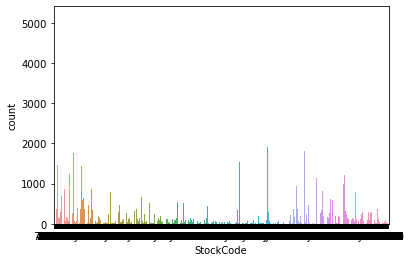

In [191]:
sns.countplot(data['StockCode'])

In [192]:
# 숫자로만
b = data[~data['StockCode'].str.contains('[^0-9]', regex=True)]
b.describe()

,Quantity,Price,Customer ID,year,month,day,quarter,total_price
count,706085.000000,706085.000000,706085.000000,706085.000000,706085.000000,706085.000000,706085.000000,706085.000000
mean,12.722451,2.974080,15308.875012,2010.450490,7.466321,15.420248,2.814694,20.382186
std,202.250924,4.604864,1695.721724,0.563791,3.396730,8.661771,1.125646,323.039627
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13958.000000,2010.000000,5.000000,8.000000,2.000000,4.680000
50%,5.000000,1.950000,15222.000000,2010.000000,8.000000,15.000000,3.000000,11.900000
75%,12.000000,3.750000,16782.000000,2011.000000,11.000000,23.000000,4.000000,19.500000
max,80995.000000,649.500000,18287.000000,2011.000000,12.000000,31.000000,4.000000,168469.600000


In [193]:
# 숫자 + 문자, 문자
data[data['StockCode'].str.contains('[^0-9]', regex=True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
12,489436,48173C,DOOR MAT BLACK FLOCK,10,12/1/2009 9:06,5.95,13078.0,United Kingdom,2009-12-01,9:06,9,2009,12,1,4,Tuesday,59.50
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,12/1/2009 9:06,4.65,13078.0,United Kingdom,2009-12-01,9:06,9,2009,12,1,4,Tuesday,55.80
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,12/1/2009 9:06,1.25,13078.0,United Kingdom,2009-12-01,9:06,9,2009,12,1,4,Tuesday,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,12/9/2011 12:19,1.79,17581.0,United Kingdom,2011-12-09,12:19,12,2011,12,9,4,Friday,17.90
541841,581580,84993A,75 GREEN PETIT FOUR CASES,2,12/9/2011 12:20,0.42,12748.0,United Kingdom,2011-12-09,12:20,12,2011,12,9,4,Friday,0.84
541847,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,12/9/2011 12:20,1.25,12748.0,United Kingdom,2011-12-09,12:20,12,2011,12,9,4,Friday,1.25
541856,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,12/9/2011 12:20,1.25,12748.0,United Kingdom,2011-12-09,12:20,12,2011,12,9,4,Friday,2.50


## To do
- Description : 워드 클라우드 (가장 많이 나온 단어)
    - cancel 한 상품
    - cancel 안한 상품
- revenue(price) :
        - 시간대, 달, 일, 요일, 분기 별로
- reorder : 
    - reorder

In [194]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,14.85


### CustomerID

In [195]:
top_customer = data['Customer ID'].value_counts()

In [196]:
top_customer.keys

<bound method Series.keys of 17841.0    12638
14911.0    11444
12748.0     6662
14606.0     6500
14096.0     5128
           ...  
13105.0        1
14095.0        1
13054.0        1
15896.0        1
16786.0        1
Name: Customer ID, Length: 5940, dtype: int64>

<AxesSubplot:xlabel='Customer ID', ylabel='count'>

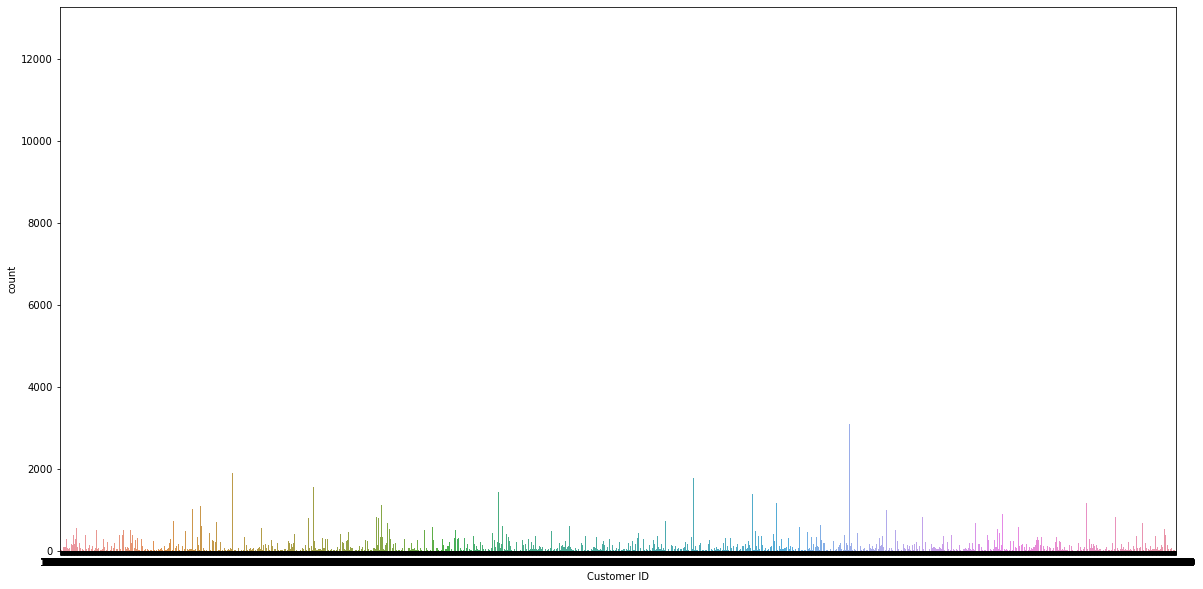

In [197]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Customer ID'])

In [198]:
data.groupby(by="Customer ID").count()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,date,time,hour,year,month,day,quarter,weekday,total_price
Customer ID,,,,,,,,,,,,,,,,
12346.0,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
12347.0,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
12348.0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
12349.0,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
12350.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938
18284.0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
18285.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [199]:
data.sort_values('Customer ID')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,3/2/2010 13:08,3.25,12346.0,United Kingdom,2010-03-02,13:08,13,2010,3,2,1,Tuesday,3.25
253044,513774,22366,DOORMAT AIRMAIL,1,6/28/2010 13:53,7.49,12346.0,United Kingdom,2010-06-28,13:53,13,2010,6,28,2,Monday,7.49
253043,513774,48187,DOORMAT NEW ENGLAND,1,6/28/2010 13:53,7.49,12346.0,United Kingdom,2010-06-28,13:53,13,2010,6,28,2,Monday,7.49
253042,513774,48188,DOORMAT WELCOME PUPPIES,1,6/28/2010 13:53,7.49,12346.0,United Kingdom,2010-06-28,13:53,13,2010,6,28,2,Monday,7.49
253041,513774,22688,DOORMAT PEACE ON EARTH BLUE,1,6/28/2010 13:53,7.49,12346.0,United Kingdom,2010-06-28,13:53,13,2010,6,28,2,Monday,7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199804,508581,84580,MOUSE TOY WITH PINK T-SHIRT,4,5/17/2010 11:55,3.75,18287.0,United Kingdom,2010-05-17,11:55,11,2010,5,17,2,Monday,15.00
199803,508581,22254,FELT TOADSTOOL LARGE,12,5/17/2010 11:55,1.25,18287.0,United Kingdom,2010-05-17,11:55,11,2010,5,17,2,Monday,15.00
199802,508581,22255,FELT TOADSTOOL SMALL,12,5/17/2010 11:55,0.85,18287.0,United Kingdom,2010-05-17,11:55,11,2010,5,17,2,Monday,10.20
198743,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,18287.0,United Kingdom,2011-05-22,10:39,10,2011,5,22,2,Sunday,19.80


### Country

In [200]:
data[['Invoice', 'Customer ID','Country']].groupby(['Invoice', 'Customer ID','Country']).count().reset_index()['Country'].value_counts()

United Kingdom          40489
Germany                  1095
France                    738
EIRE                      727
Netherlands               250
Spain                     188
Belgium                   183
Sweden                    128
Portugal                  122
Switzerland               120
Australia                 117
Italy                      92
Channel Islands            79
Finland                    68
Japan                      56
Norway                     53
Denmark                    53
Austria                    51
Cyprus                     45
Poland                     38
USA                        25
Greece                     21
Unspecified                19
Malta                      16
Singapore                  14
United Arab Emirates       14
Israel                      8
Iceland                     8
Canada                      8
Lithuania                   6
Czech Republic              5
European Community          5
Bahrain                     4
Korea     

In [201]:
top_country = data[['Invoice', 'Customer ID','Country']].groupby(['Invoice', 'Customer ID','Country']).count().reset_index()
top_country['Country'].value_counts()

United Kingdom          40489
Germany                  1095
France                    738
EIRE                      727
Netherlands               250
Spain                     188
Belgium                   183
Sweden                    128
Portugal                  122
Switzerland               120
Australia                 117
Italy                      92
Channel Islands            79
Finland                    68
Japan                      56
Norway                     53
Denmark                    53
Austria                    51
Cyprus                     45
Poland                     38
USA                        25
Greece                     21
Unspecified                19
Malta                      16
Singapore                  14
United Arab Emirates       14
Israel                      8
Iceland                     8
Canada                      8
Lithuania                   6
Czech Republic              5
European Community          5
Bahrain                     4
Korea     

<AxesSubplot:xlabel='Country', ylabel='count'>

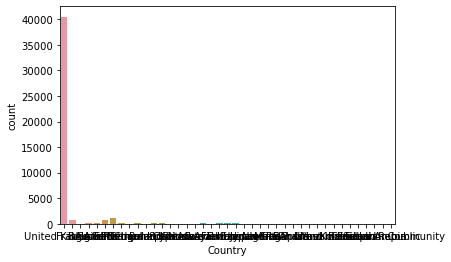

In [202]:
sns.countplot(x=top_country['Country'])

### Description

In [203]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5149
REGENCY CAKESTAND 3 TIER              3678
JUMBO BAG RED RETROSPOT               2713
ASSORTED COLOUR BIRD ORNAMENT         2709
PARTY BUNTING                         2121
                                      ... 
HAPPY BIRTHDAY GINGER CAT CARD           1
BLUE BAROQUE FLOCK CANDLE HOLDER         1
S/4 BLACK DISCO PARTITION PANEL          1
BLACK RND BULLET"KEEP CLEAN" BIN         1
GREEN CHENILLE SHAGGY C/COVER            1
Name: Description, Length: 5298, dtype: int64

In [204]:
import nltk

In [205]:
data['Description']

0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
541909                                POSTAGE
Name: Description, Length: 797869, dtype: object

In [206]:
word_tokens = data['Description'].apply(lambda x : nltk.word_tokenize(x))

In [207]:
word_tokens

0         [15CM, CHRISTMAS, GLASS, BALL, 20, LIGHTS]
1                             [PINK, CHERRY, LIGHTS]
2                            [WHITE, CHERRY, LIGHTS]
3               [RECORD, FRAME, 7, '', SINGLE, SIZE]
4                [STRAWBERRY, CERAMIC, TRINKET, BOX]
                             ...                    
541905            [CHILDREN, 'S, APRON, DOLLY, GIRL]
541906             [CHILDRENS, CUTLERY, DOLLY, GIRL]
541907          [CHILDRENS, CUTLERY, CIRCUS, PARADE]
541908            [BAKING, SET, 9, PIECE, RETROSPOT]
541909                                     [POSTAGE]
Name: Description, Length: 797869, dtype: object

In [208]:
import swifter  # docu 보

In [209]:
tokens_pos = word_tokens.swifter.apply(lambda x :nltk.pos_tag(x))

Pandas Apply:   0%|          | 0/797869 [00:00<?, ?it/s]

In [ ]:
# .PROGRESS_APPLY

In [210]:
NN_words = []
for i in range(len(tokens_pos)):
    for word, pos in tokens_pos.iloc[i]:
        if 'NN' in pos:
            NN_words.append(word)
print(NN_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [211]:
lower_words = [i.lower() for i in NN_words]

In [212]:
from nltk.corpus import stopwords

In [213]:
stopwords_list = stopwords.words('english')

In [215]:
from tqdm import tqdm

In [217]:
babo= pd.DataFrame(lower_words)

In [218]:
babo['check'] ='-'

In [219]:
for i in tqdm(stopwords_list):
    babo['check'][babo[0] == i] = 'babo'
       


 87%|████████▋ | 155/179 [00:18<00:02,  8.30it/s]


100%|██████████| 179/179 [00:21<00:00,  8.35it/s]


In [220]:
babo['check'].value_counts()

-       3141886
babo     139152
Name: check, dtype: int64

In [222]:
lower_words = babo[babo['check'] !='babo'][0].to_list()

In [223]:
lower_words 

['christmas',
 'glass',
 'ball',
 'lights',
 'pink',
 'cherry',
 'lights',
 'white',
 'cherry',
 'lights',
 'record',
 'frame',
 'single',
 'size',
 'strawberry',
 'ceramic',
 'trinket',
 'box',
 'pink',
 'doughnut',
 'trinket',
 'pot',
 'save',
 'planet',
 'mug',
 'fancy',
 'font',
 'home',
 'sweet',
 'home',
 'doormat',
 'cat',
 'bowl',
 'dog',
 'bowl',
 'chasing',
 'ball',
 'design',
 'heart',
 'measuring',
 'spoons',
 'large',
 'lunchbox',
 'cutlery',
 'fairy',
 'cakes',
 'door',
 'mat',
 'black',
 'flock',
 'love',
 'building',
 'block',
 'word',
 'home',
 'building',
 'block',
 'word',
 'assorted',
 'colour',
 'bird',
 'ornament',
 'peace',
 'wooden',
 'block',
 'letters',
 'christmas',
 'craft',
 'white',
 'fairy',
 'heart',
 'ivory',
 'trellis',
 'large',
 'heart',
 'filigree',
 'dove',
 'large',
 'full',
 'english',
 'breakfast',
 'plate',
 'pizza',
 'plate',
 'box',
 'black',
 'diner',
 'wall',
 'clock',
 'set',
 'black',
 'flying',
 'ducks',
 'area',
 'patrolled',
 'metal',


In [224]:
from collections import Counter

In [225]:
c = Counter(lower_words)

In [231]:
k = 100
print(c.most_common(k))

[('set', 70158), ('bag', 69535), ('heart', 59322), ('pink', 45513), ('retrospot', 45051), ('design', 42561), ('vintage', 42091), ('box', 38206), ('white', 38033), ('red', 36999), ('cake', 35668), ('metal', 35237), ('christmas', 33314), ('blue', 29895), ('hanging', 28764), ('holder', 27860), ('sign', 27187), ('jumbo', 26993), ('pack', 24706), ('lunch', 24654), ('paper', 23129), ('t-light', 22900), ('tea', 20308), ('glass', 19908), ('small', 19338), ('card', 18896), ('cases', 18469), ('spotty', 18046), ('wooden', 17223), ('decoration', 17073), ('bottle', 16856), ('hot', 16409), ('ceramic', 16144), ('water', 15977), ('spaceboy', 15116), ('rose', 14293), ('mug', 13836), ('home', 13813), ('tin', 13742), ('paisley', 13629), ('fairy', 13277), ('cream', 13124), ('feltcraft', 12708), ('spot', 12677), ('assorted', 12572), ('party', 12104), ('polkadot', 11946), ('garden', 11667), ('mini', 11633), ('black', 11607), ('bunting', 11519), ('doormat', 11128), ('strawberry', 10702), ('retro', 10590), ('

In [246]:
common_words = c.most_common(100)

In [247]:
common_words_df = pd.DataFrame(common_words, columns=['noun', 'counts'])

[Text(0, 0, 'set'),
 Text(1, 0, 'bag'),
 Text(2, 0, 'heart'),
 Text(3, 0, 'pink'),
 Text(4, 0, 'retrospot'),
 Text(5, 0, 'design'),
 Text(6, 0, 'vintage'),
 Text(7, 0, 'box'),
 Text(8, 0, 'white'),
 Text(9, 0, 'red'),
 Text(10, 0, 'cake'),
 Text(11, 0, 'metal'),
 Text(12, 0, 'christmas'),
 Text(13, 0, 'blue'),
 Text(14, 0, 'hanging'),
 Text(15, 0, 'holder'),
 Text(16, 0, 'sign'),
 Text(17, 0, 'jumbo'),
 Text(18, 0, 'pack'),
 Text(19, 0, 'lunch'),
 Text(20, 0, 'paper'),
 Text(21, 0, 't-light'),
 Text(22, 0, 'tea'),
 Text(23, 0, 'glass'),
 Text(24, 0, 'small'),
 Text(25, 0, 'card'),
 Text(26, 0, 'cases'),
 Text(27, 0, 'spotty'),
 Text(28, 0, 'wooden'),
 Text(29, 0, 'decoration'),
 Text(30, 0, 'bottle'),
 Text(31, 0, 'hot'),
 Text(32, 0, 'ceramic'),
 Text(33, 0, 'water'),
 Text(34, 0, 'spaceboy'),
 Text(35, 0, 'rose'),
 Text(36, 0, 'mug'),
 Text(37, 0, 'home'),
 Text(38, 0, 'tin'),
 Text(39, 0, 'paisley'),
 Text(40, 0, 'fairy'),
 Text(41, 0, 'cream'),
 Text(42, 0, 'feltcraft'),
 Text(43, 

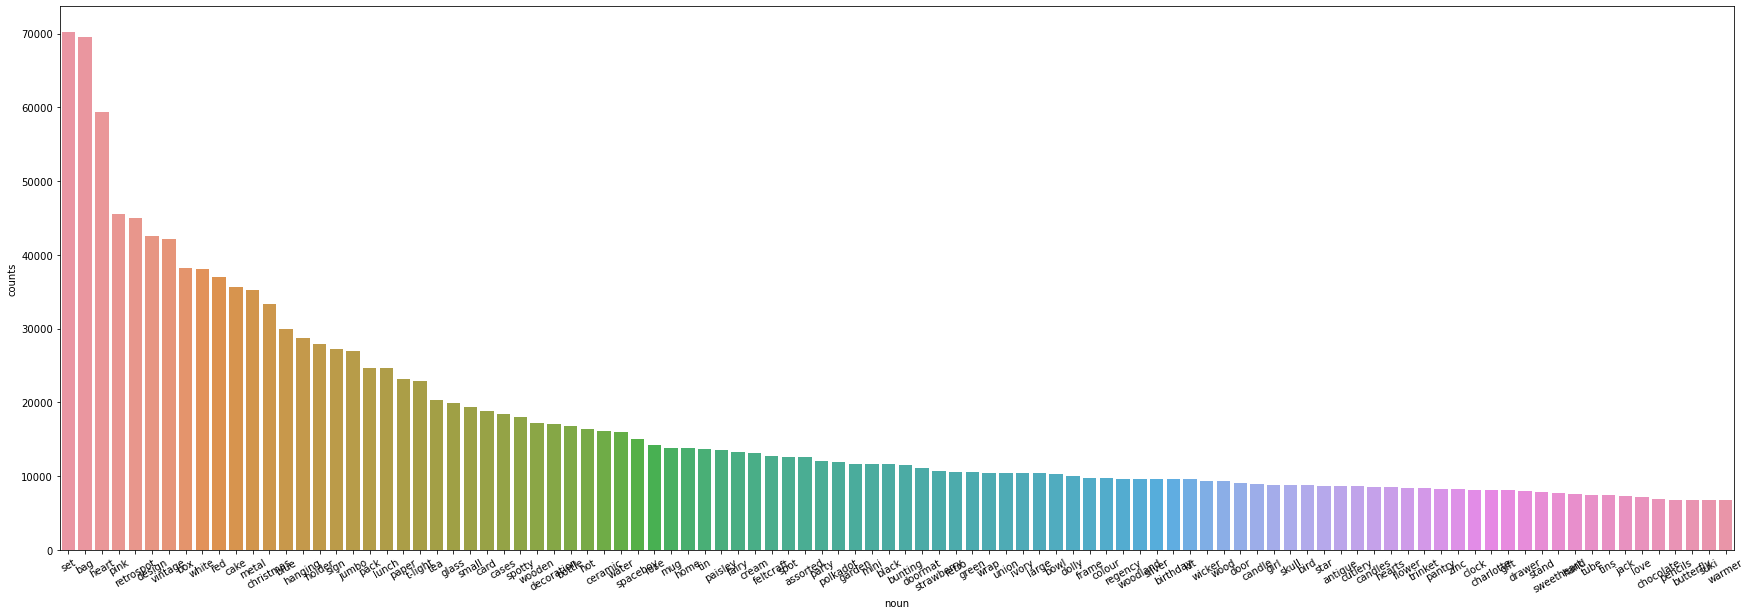

In [254]:
plt.figure(figsize=(30,10))
ax = sns.barplot(common_words_df['noun'], common_words_df['counts'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, size=10)